# Music & Mental Health | Trying to predict music effects

## Data Cleaning 2

In [36]:
# Load libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [37]:
# Read cleaned dataset

data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned1.csv')
data_mmh.head()

,Unnamed: 0,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [38]:
data_mmh.shape

(617, 32)

In [39]:
# What to do with "Unnamed column"

#Remove the Unnamed Column: 
#data = pd.read_csv('your_dataset.csv', index_col=0)

#data = data.drop(columns=['Unnamed: 0'])

#Rename the Unnamed Column:
#data = data.rename(columns={'Unnamed: 0': 'ID'})

#Retain as an Index:
#data = pd.read_csv('your_dataset.csv', index_col=0)

#Check the Origin of the Column:

In [40]:
#Remove the Unnamed Column: 
#data_mmh = pd.read_csv('data_mmh_cleaned1.csv', index_col=0)
data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned1.csv', index_col=0)
data_mmh.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


### Computing mean, median and mode:

In [41]:
mean_bpm = data_mmh['BPM'].mean()
mean_bpm 

1620868.8589951377

### Questions: 
* Why is 1620868.8589951377 the mean value of BPM if the rows with these KNNImputer values where dropped?
Ignacio: "This would be like "Thunderstruck from ACDC"

* Is it because of the "Unnamed" column?
___

* Find out where this outlier is that is destroying your mean
* Check with histplot, barplot, ...

### Identify outlier

In [42]:
median_bpm = data_mmh['BPM'].median()
median_bpm 

120.0

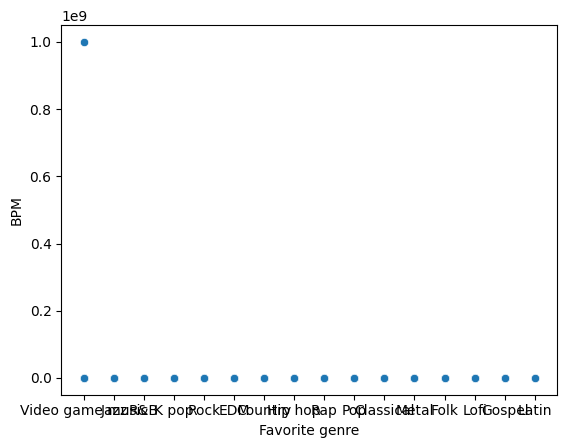

In [43]:
#sns.scatterplot(x=x, y=y)
#plt.show()

x = data_mmh['Favorite genre']
y = data_mmh['BPM']

sns.scatterplot(x=x, y=y)
plt.show()

<Axes: xlabel='Favorite genre', ylabel='BPM'>

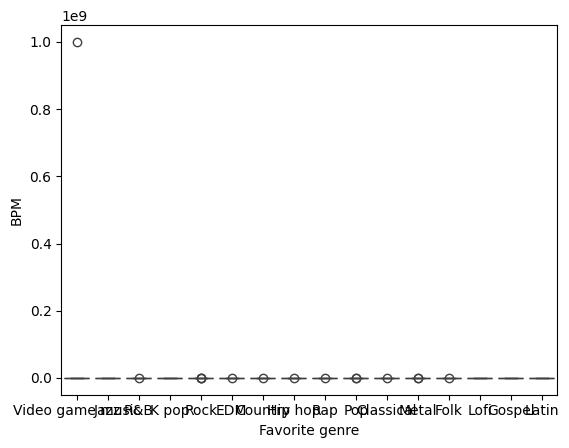

In [44]:
#Box Plot (Box-and-Whisker Plot):

# Example data
#data = data_mmh['BPM']

x = data_mmh['Favorite genre']
y = data_mmh['BPM']

# Create a box plot
#sns.boxplot(data=data)
#plt.show()

# Create a box plot
#sns.boxplot(data=data)
#plt.show()

#sns.scatterplot(x=x, y=y)
sns.boxplot(x=x, y=y)

In [45]:
  #How to get one row with specific value
data = data_mmh['BPM']

df = pd.DataFrame(data)

specific_value = "1620868.8589951377"
result = df[df["BPM"] == specific_value]

if not result.empty:
    print(result.iloc[0])  # Print the first matching row
else:
    print("No matching row found.")

No matching row found.


In [46]:
#df[ df[‘salary’] > 25000 ]
df[ df['BPM'] == 1620868.8589951377 ]

,BPM


In [47]:
data_mmh.isna().sum()

Age                             0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Favorite genre                  0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects 

In [48]:
df['BPM'].nunique()

135

In [49]:
df['BPM'].unique()

array([1.32000000e+02, 8.40000000e+01, 1.07000000e+02, 8.60000000e+01,
       6.60000000e+01, 9.50000000e+01, 9.40000000e+01, 1.55000000e+02,
       1.25000000e+02, 8.80000000e+01, 1.48000000e+02, 1.03000000e+02,
       1.20000000e+02, 9.90000000e+01, 1.18000000e+02, 7.90000000e+01,
       1.69000000e+02, 1.36000000e+02, 1.01000000e+02, 1.26000000e+02,
       1.83000000e+02, 1.42000000e+02, 7.50000000e+01, 8.90000000e+01,
       1.40000000e+02, 1.61000000e+02, 8.00000000e+01, 1.30000000e+02,
       1.47000000e+02, 7.70000000e+01, 1.15000000e+02, 1.57000000e+02,
       9.00000000e+01, 1.28000000e+02, 9.60000000e+01, 9.10000000e+01,
       5.50000000e+01, 8.50000000e+01, 1.60000000e+02, 1.08000000e+02,
       1.56000000e+02, 1.70000000e+02, 1.74000000e+02, 1.27000000e+02,
       1.65000000e+02, 1.13000000e+02, 1.67000000e+02, 1.10000000e+02,
       1.50000000e+02, 9.30000000e+01, 1.09000000e+02, 1.75000000e+02,
       1.62000000e+02, 1.89000000e+02, 1.21000000e+02, 2.00000000e+02,
      

In [50]:
df['BPM'].value_counts()

BPM
120.0    45
140.0    24
150.0    18
110.0    16
105.0    14
         ..
181.0     1
106.0     1
191.0     1
40.0      1
168.0     1
Name: count, Length: 135, dtype: int64

In [51]:
data = data_mmh['BPM']

df = pd.DataFrame(data)

specific_value = 1620868.8589951377

count = df["BPM"].value_counts().get(specific_value, 0)
print(f"The value {specific_value} appears {count} times in the DataFrame.")

The value 1620868.8589951377 appears 0 times in the DataFrame.


* After check in Tableau, the outlier is discovered in **'Video game music'** of **'Favorite genre'**
* How to get BPM by value Video game music (Favorite genre) ?
* How to get unique value / row of outlier?

In [52]:
#superstore.pivot_table(index=['Category','Region'], values=['Sales','Profit'])
data_mmh.pivot_table(index=['Favorite genre'], values=['BPM'])

,BPM
Favorite genre,
Classical,1.148158e+02
Country,1.101905e+02
EDM,1.475000e+02
Folk,1.097200e+02
Gospel,8.925000e+01
Hip hop,1.119062e+02
Jazz,1.244737e+02
K pop,1.289048e+02
Latin,1.225000e+02


In [53]:
data_mmh[['Favorite genre', 'BPM']].pivot_table(index= ['Favorite genre'], aggfunc = ['min','max','mean'])

,min,max,mean
,BPM,BPM,BPM
Favorite genre,,,
Classical,40.0,181.0,1.148158e+02
Country,85.0,163.0,1.101905e+02
EDM,85.0,624.0,1.475000e+02
Folk,0.0,186.0,1.097200e+02
Gospel,8.0,174.0,8.925000e+01
Hip hop,20.0,178.0,1.119062e+02
Jazz,81.0,200.0,1.244737e+02
K pop,80.0,204.0,1.289048e+02


In [54]:
data = data_mmh['BPM']

df = pd.DataFrame(data)

specific_value = 999999999.0

count = df["BPM"].value_counts().get(specific_value, 0)
print(f"The value {specific_value} appears {count} times in the DataFrame.")

The value 999999999.0 appears 1 times in the DataFrame.


In [55]:
# Identify row with specific value
df[ df['BPM'] == 999999999.0]

,BPM
472,999999999.0


This is the row with outlier. 
* What should we do with this row?

In [56]:
row = data_mmh.iloc[472]
row

Age                                         16.0
Hours per day                                7.0
While working                                Yes
Instrumentalist                               No
Composer                                      No
Favorite genre                  Video game music
Exploratory                                  Yes
Foreign languages                             No
BPM                                  999999999.0
Frequency [Classical]                      Never
Frequency [Country]                       Rarely
Frequency [EDM]                        Sometimes
Frequency [Folk]                          Rarely
Frequency [Gospel]                         Never
Frequency [Hip hop]                       Rarely
Frequency [Jazz]                          Rarely
Frequency [K pop]                          Never
Frequency [Latin]                          Never
Frequency [Lofi]                           Never
Frequency [Metal]                Very frequently
Frequency [Pop]     

In [57]:
data_mmh.shape

(617, 31)

In [58]:
# Suppose you want to drop the row at index 2 (which is the third row, since indexing starts at 0)
index_to_drop = 472

# Use the drop method to remove the specific row
#df = df.drop(index_to_drop)
data_mmh = data_mmh.drop(index_to_drop)

In [59]:
data_mmh.shape

(616, 31)

In [60]:
row = data_mmh.iloc[472]
row

Age                                        21.0
Hours per day                               1.0
While working                                No
Instrumentalist                              No
Composer                                     No
Favorite genre                              R&B
Exploratory                                 Yes
Foreign languages                           Yes
BPM                                        81.0
Frequency [Classical]                     Never
Frequency [Country]                       Never
Frequency [EDM]                           Never
Frequency [Folk]                          Never
Frequency [Gospel]                       Rarely
Frequency [Hip hop]             Very frequently
Frequency [Jazz]                          Never
Frequency [K pop]                         Never
Frequency [Latin]                         Never
Frequency [Lofi]                          Never
Frequency [Metal]                         Never
Frequency [Pop]                 Very fre

In [61]:
# Reset the index to make it continuous and zero-based
#df = df.reset_index(drop=True)
data_mmh = data_mmh.reset_index(drop=True)

In [62]:
data_mmh.shape

(616, 31)

In [63]:
row = data_mmh.iloc[472]
row

Age                                        21.0
Hours per day                               1.0
While working                                No
Instrumentalist                              No
Composer                                     No
Favorite genre                              R&B
Exploratory                                 Yes
Foreign languages                           Yes
BPM                                        81.0
Frequency [Classical]                     Never
Frequency [Country]                       Never
Frequency [EDM]                           Never
Frequency [Folk]                          Never
Frequency [Gospel]                       Rarely
Frequency [Hip hop]             Very frequently
Frequency [Jazz]                          Never
Frequency [K pop]                         Never
Frequency [Latin]                         Never
Frequency [Lofi]                          Never
Frequency [Metal]                         Never
Frequency [Pop]                 Very fre

In [64]:
# Identify row with specific value
df[ df['BPM'] == 999999999.0]

,BPM
472,999999999.0


In [65]:
# Identify row with specific value
data_mmh[ df['BPM'] == 999999999.0]

/var/folders/1t/xp0_q_jn0_xd2c4cl073hdrw0000gn/T/ipykernel_75825/4155276556.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_mmh[ df['BPM'] == 999999999.0]


,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
472,21.0,1.0,No,No,No,R&B,Yes,Yes,81.0,Never,...,Very frequently,Sometimes,Never,Never,3.0,0.0,0.0,0.0,Improve,I understand.


In [66]:
row = data_mmh.iloc[472]
row

Age                                        21.0
Hours per day                               1.0
While working                                No
Instrumentalist                              No
Composer                                     No
Favorite genre                              R&B
Exploratory                                 Yes
Foreign languages                           Yes
BPM                                        81.0
Frequency [Classical]                     Never
Frequency [Country]                       Never
Frequency [EDM]                           Never
Frequency [Folk]                          Never
Frequency [Gospel]                       Rarely
Frequency [Hip hop]             Very frequently
Frequency [Jazz]                          Never
Frequency [K pop]                         Never
Frequency [Latin]                         Never
Frequency [Lofi]                          Never
Frequency [Metal]                         Never
Frequency [Pop]                 Very fre

In [67]:
# Saving DataFrames into csv file 

data_mmh.to_csv('../../data/cleaned/data_mmh_cleaned2.csv')

In [68]:
# Read cleaned dataset

#Remove the Unnamed Column: 
data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned2.csv', index_col=0)
data_mmh.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


### Continue computing mean, median and mode:

* What is a faster way to compute this?

In [69]:
# Mean/Mode 'Music use':
#Hours per day (Numerical)
mean_hours_per_day = data_mmh['Hours per day'].mean()

#While working (Categorical)
mode_while_working = data_mmh['While working'].mode()

#Instrumentalist (Categorical)
mode_instrumentalist = data_mmh['Instrumentalist'].mode()

#Composer (Categorical)
mode_composer = data_mmh['Composer'].mode()

# Music preference:
#Favorite genre (Categorical)

# Exploratory (Categorical)
mode_exploratory = data_mmh['Exploratory'].mode()

#Foreign languages (Categorical)
mode_foreign_languages = data_mmh['Foreign languages'].mode()

#BPM (Numerical)
mean_bpm = data_mmh['BPM'].mean()
median_bpm = data_mmh['BPM'].median()
 
# Mean 'Disease':
# Mean 'Anxiety' (Numerical):
mean_anxiety = data_mmh['Anxiety'].mean()
mean_depression = data_mmh['Depression'].mean()
mean_insomnia = data_mmh['Insomnia'].mean()
mean_ocd = data_mmh['OCD'].mean()

# Mean/mode 'Music effects' (Categorical)
mode_music_effects = data_mmh['Music effects'].mode()

# Mode 'Music genre'(Categorical):
# Mode 'Favorite genre':
mode_favorite_genre = data_mmh['Favorite genre'].mode()

# Mode 'Frequencies [Music genre]':
mode_freq_classical = data_mmh['Frequency [Classical]'].mode()      
mode_freq_country = data_mmh['Frequency [Country]'].mode()  
mode_freq_edm = data_mmh['Frequency [EDM]'].mode()  
mode_freq_folk = data_mmh['Frequency [Folk]'].mode()        
mode_freq_gospel = data_mmh['Frequency [Gospel]'].mode()   
mode_freq_hiphop = data_mmh['Frequency [Hip hop]'].mode()
mode_freq_jazz = data_mmh['Frequency [Jazz]'].mode()
mode_freq_kpop = data_mmh['Frequency [K pop]'].mode() 
mode_freq_latin = data_mmh['Frequency [Latin]'].mode()           
mode_freq_lofi = data_mmh['Frequency [Lofi]'].mode()               
mode_freq_metal = data_mmh['Frequency [Metal]'].mode()            
mode_freq_pop = data_mmh['Frequency [Pop]'].mode()             
mode_freq_rb = data_mmh['Frequency [R&B]'].mode()        
mode_freq_rap = data_mmh['Frequency [Rap]'].mode()   
mode_freq_rock = data_mmh['Frequency [Rock]'].mode()                
mode_freq_mode = data_mmh['Frequency [Video game music]'].mode()     

print(mode_exploratory)
print(mode_foreign_languages)
print(mean_bpm)
print(median_bpm)

print(mean_hours_per_day) 

print(mode_while_working) 
print(mode_instrumentalist) 
print(mode_composer) 

print(mean_anxiety)
print(mean_depression)
print(mean_insomnia)
print(mean_ocd)

0    Yes
Name: Exploratory, dtype: object
0    Yes
Name: Foreign languages, dtype: object
123.51785714285714
120.0
3.6991883116883115
0    Yes
Name: While working, dtype: object
0    No
Name: Instrumentalist, dtype: object
0    No
Name: Composer, dtype: object
5.892045454545454
4.89448051948052
3.80275974025974
2.663961038961039


In [70]:
print(mode_music_effects)

print(mode_favorite_genre)

print(mode_freq_classical)
print(mode_freq_country)
print(mode_freq_edm)
print(mode_freq_folk)
print(mode_freq_gospel)
print(mode_freq_hiphop)
print(mode_freq_jazz)
print(mode_freq_kpop)
print(mode_freq_latin)
print(mode_freq_lofi)
print(mode_freq_metal)
print(mode_freq_pop)
print(mode_freq_rb)
print(mode_freq_rap)
print(mode_freq_rock)

0    Improve
Name: Music effects, dtype: object
0    Rock
Name: Favorite genre, dtype: object
0    Rarely
Name: Frequency [Classical], dtype: object
0    Never
Name: Frequency [Country], dtype: object
0    Never
Name: Frequency [EDM], dtype: object
0    Never
Name: Frequency [Folk], dtype: object
0    Never
Name: Frequency [Gospel], dtype: object
0    Sometimes
Name: Frequency [Hip hop], dtype: object
0    Rarely
Name: Frequency [Jazz], dtype: object
0    Never
Name: Frequency [K pop], dtype: object
0    Never
Name: Frequency [Latin], dtype: object
0    Never
Name: Frequency [Lofi], dtype: object
0    Never
Name: Frequency [Metal], dtype: object
0    Very frequently
Name: Frequency [Pop], dtype: object
0    Never
Name: Frequency [R&B], dtype: object
0    Rarely
Name: Frequency [Rap], dtype: object
0    Very frequently
Name: Frequency [Rock], dtype: object


In [71]:
data_mmh.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [72]:
data_mmh.shape

(616, 31)


### Trying to predict music effects:

1) What is the connection between **music use** and its effect on **disease**(mental health)?
2) What is the connection between **music preference** and effect on **disease**(mental health)? 
* Granularity --> fav genre as first, related statistcal, individualy fre compare to disease
3) What is the connection between **music genre** and effect on **disease**(mental health)?
4) Which **disease**(mental health) experiences the **greatest effect** from music? 
* Plot difference between mental health and anxiety
5) Can I make helpful recommendations based on these findings? 
6) What **age** (range) experiences the most the **diseases**. What is there music effect? What music genre do they listen to?
What is there music use?

_________

- Calculate the right things
- Plot these questions
In order to plot you first need to calculate the right thing.
- Plot when visualization is relevant

### 1) Connection **disease** and **music use**:

In [ ]:
# 1) What is the connection between **disease** (numerical) and **music use** (categorical)?
# Get "disease" and "music use"
# Create a for loop?

**disease**

# Mean 'Disease' (Numerical):
mean_anxiety = data_mmh['Anxiety'].mean()
mean_depression = data_mmh['Depression'].mean()
mean_insomnia = data_mmh['Insomnia'].mean()
mean_ocd = data_mmh['OCD'].mean()

**music use**

#Hours per day (Numerical)
mean_hours_per_day = data_mmh['Hours per day'].mean()
#While working (Categorical)
mode_while_working = data_mmh['While working'].mode()
#Instrumentalist (Categorical)
mode_instrumentalist = data_mmh['Instrumentalist'].mode()
#Composer (Categorical)
mode_composer = data_mmh['Composer'].mode()


#Get average 'Anxiety' (numerical) for every possible music use (categorical)
Get average 'Anxiety' (numerical) for every possible music use 
#Hours per day (Numerical)
#While working (Categorical)
#Instrumentalist (Categorical)
#Composer (Categorical)

Get average 'Depression' (numerical) for every possible music use 
#Hours per day (Numerical)
#While working (Categorical)
#Instrumentalist (Categorical)
#Composer (Categorical)

Get average 'Insomnia' (numerical) for every possible music use
#Hours per day (Numerical)
#While working (Categorical)
#Instrumentalist (Categorical)
#Composer (Categorical)

Get average 'OCD' (numerical) for every possible music use 
#Hours per day (Numerical)
#While working (Categorical)
#Instrumentalist (Categorical)
#Composer (Categorical)

# Create a for loop: (define function?)


In [74]:
data_mmh[['Anxiety','Depression','Insomnia', 'OCD','Music effects']]

,Anxiety,Depression,Insomnia,OCD,Music effects
0,7.0,7.0,10.0,2.0,No effect
1,9.0,7.0,3.0,3.0,Improve
2,7.0,2.0,5.0,9.0,Improve
3,8.0,8.0,7.0,7.0,Improve
4,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...
611,7.0,6.0,0.0,9.0,Improve
612,3.0,2.0,2.0,5.0,Improve
613,2.0,2.0,2.0,2.0,Improve
614,2.0,3.0,2.0,1.0,Improve


In [75]:
data_mmh[['Anxiety','Music effects']]

,Anxiety,Music effects
0,7.0,No effect
1,9.0,Improve
2,7.0,Improve
3,8.0,Improve
4,4.0,Improve
...,...,...
611,7.0,Improve
612,3.0,Improve
613,2.0,Improve
614,2.0,Improve


In [76]:
# Get average 'Anxiety' (numerical) for every possible music use:
data_mmh.groupby(['Hours per day']).agg({'Anxiety': 'mean'}).head()
data_mmh.groupby(['While working']).agg({'Anxiety': 'mean'}).head()
data_mmh.groupby(['Instrumentalist']).agg({'Anxiety': 'mean'}).head()
data_mmh.groupby(['Composer']).agg({'Anxiety': 'mean'}).head()

#Hours per day (numerical)
#While working (categorical)
#Instrumentalist (categorical)
#Composer (categorical)

display(data_mmh.groupby(['Hours per day']).agg({'Anxiety': 'mean'}).head())
display(data_mmh.groupby(['While working']).agg({'Anxiety': 'mean'}).head())
display(data_mmh.groupby(['Instrumentalist']).agg({'Anxiety': 'mean'}).head())
display(data_mmh.groupby(['Composer']).agg({'Anxiety': 'mean'}).head())

,Anxiety
Hours per day,
0.00,7.666667
0.25,5.000000
0.50,6.375000
0.70,5.000000
1.00,5.333333


,Anxiety
While working,
No,5.706349
Yes,5.939796


,Anxiety
Instrumentalist,
No,5.811298
Yes,6.060000


,Anxiety
Composer,
No,5.878937
Yes,5.953704


In [77]:
data_mmh.groupby(['While working']).agg({'Anxiety': 'mean'}).head()

,Anxiety
While working,
No,5.706349
Yes,5.939796


### 2) Connection **disease** and **music preference**:

In [ ]:
# 2) What is the connection between **disease** (numerical) and **music preference** (categorical)? 
#(granularity --> fav genre as first, related statistcal, individualy fre compare to disease)
# Get "disease" and "music preference"
# Create a for loop?

**music preference**

#Favorite genre (categorical)
#Exploratory (categorical)
#Foreign languages (categorical)
#BPM (numerical)

**disease** (numerical)

# Mean 'Disease' (numerical):
mean_anxiety = data_mmh['Anxiety'].mean()
mean_depression = data_mmh['Depression'].mean()
mean_insomnia = data_mmh['Insomnia'].mean()
mean_ocd = data_mmh['OCD'].mean()

#Get average 'Anxiety' (numerical) for every possible music preference (cat/num):
Get average 'Anxiety' (numerical) for every possible music preference 
#Favorite genre (categorical)
#Exploratory (categorical)
#Foreign languages (categorical)
#BPM (numerical)

Get average 'Depression' (numerical) for every possible music preference 
#Favorite genre (categorical)
#Exploratory (categorical)
#Foreign languages (categorical)
#BPM (numerical)

Get average 'Insomnia' (numerical) for every possible music preference
#Favorite genre (categorical)
#Exploratory (categorical)
#Foreign languages (categorical)
#BPM (numerical)

Get average 'OCD' (numerical) for every possible music preference 
#Favorite genre (categorical)
#Exploratory (categorical)
#Foreign languages (categorical)
#BPM (numerical)


### 3) Connection **disease** and **music genres**:

In [ ]:
#3) What is the connection between **disease** and **music genres** ?
# Get "disease" and "music genres"
# Create a for loop?

**music genres**
Favorite genre (categorical)

*Frequency genre** (numerical)
Frequency [Classical]             
Frequency [Country]               
Frequency [EDM]                   
Frequency [Folk]                  
Frequency [Gospel]               
Frequency [Hip hop]               
Frequency [Jazz]                  
Frequency [K pop]               
Frequency [Latin]                 
Frequency [Lofi]                  
Frequency [Metal]              
Frequency [Pop]                
Frequency [R&B]                   
Frequency [Rap]                  
Frequency [Rock]                
Frequency [Video game music] 
        'Rarely'
        'Sometimes'
        'Never'
        'Very frequently' 

**disease** (numerical)

# Mean 'Disease' (numerical):
mean_anxiety = data_mmh['Anxiety'].mean()
mean_depression = data_mmh['Depression'].mean()
mean_insomnia = data_mmh['Insomnia'].mean()
mean_ocd = data_mmh['OCD'].mean()

#Get average 'Anxiety' (numerical) for every possible music genre (categorical):
Get average 'Anxiety' (numerical) for 'Music genre' (categorical)
#Favorite genre (categorical)  ['Latin','Rock','Video game music', 'Jazz', 'R&B', 
# 'K pop','Country', 'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal','Folk', 'Lofi', 'Gospel]

Get average 'Depression' (numerical) for 'Music genre' (categorical) 
#Favorite genre (categorical)

Get average 'Insomnia' (numerical) for 'Music genre' (categorical)
#Favorite genre (categorical)

Get average 'OCD' (numerical) for 'Music genre' (categorical) 
#Favorite genre (categorical)

___

#Get average 'Anxiety' (numerical) for every 'Frequency ['Genre']' (categorical) possible music genre (cat/num):
Get average 'Anxiety' (numerical) for every 'Frequency ['Genre']' (categorical)
#Frequency [Classical] ['Rarely','Sometimes','Never','Very frequently']
#Frequency [Country]               
#Frequency [EDM]                   
#Frequency [Folk]                  
#Frequency [Gospel]               
#Frequency [Hip hop]               
#Frequency [Jazz]                  
#Frequency [K pop]               
#Frequency [Latin]                 
#Frequency [Lofi]                  
#Frequency [Metal]              
#Frequency [Pop]                
#Frequency [R&B]                   
#Frequency [Rap]                  
#Frequency [Rock]                
#Frequency [Video game music]  

Get average 'Depression' (numerical) for every 'Frequency ['Genre']' (categorical)

Get average 'Insomnia' (numerical) for every 'Frequency ['Genre']' (categorical)

Get average 'OCD' (numerical) for every 'Frequency ['Genre']' (categorical)

### 4) Connection **disease** and **greatest music effects**:

In [ ]:
#4) Which **disease** experiences the **greatest effect** from music? 
#Plot the difference between mental health and anxiety
# Get "disease" and "music effect"
# Create a for loop?

**disease**

# Mean 'Disease' (numerical):
mean_anxiety = data_mmh['Anxiety'].mean()
mean_depression = data_mmh['Depression'].mean()
mean_insomnia = data_mmh['Insomnia'].mean()
mean_ocd = data_mmh['OCD'].mean()

** music effects (greatest effect from music)** (categorical)
* Music effects
    Improve
    No effect
    Worsen

#Get average 'Anxiety' (numerical) for every possible music effect (categorical):
Get average 'Anxiety' (numerical) for 'Music effects' (categorical)
#'Music effects' (categorical):  [Improve, No effect, Worsen]

Get average 'Depression' (numerical) for 'Music effects' (categorical) 
#'Music effects' (categorical):  [Improve, No effect, Worsen]

Get average 'Insomnia' (numerical) for every 'Frequency ['Genre']' (categorical)
#'Music effects' (categorical):  [Improve, No effect, Worsen]

Get average 'OCD' (numerical) for every 'Frequency ['Genre']' (categorical)
#'Music effects' (categorical):  [Improve, No effect, Worsen]

In [78]:
data_mmh.groupby(['Music effects']).agg({'Anxiety': 'mean'})

,Anxiety
Music effects,
Improve,6.134120
No effect,4.970370
Worsen,6.666667


In [ ]:
data_mmh.groupby(['Music effects']).agg({'Anxiety': 'mean'})
data_mmh.groupby(['Music effects']).agg({'Depression': 'mean'})
data_mmh.groupby(['Music effects']).agg({'Insomnia': 'mean'})
data_mmh.groupby(['Music effects']).agg({'OCD': 'mean'})

#How to get this in a plot with the use of a for loop /function?

### 5) Connections **disease** and **age**:

In [ ]:
5) What **age** experiences the most the **diseases**.
What is their **music effect**? 
What **music** do they listen to? 
How do they listen to music?

**age** (numerical)
**diseases** (categorical)

# Mean 'Disease' (numerical):
mean_anxiety = data_mmh['Anxiety'].mean()
mean_depression = data_mmh['Depression'].mean()
mean_insomnia = data_mmh['Insomnia'].mean()
mean_ocd = data_mmh['OCD'].mean()

**music effect** (categorical)

**music genres** (categorical/numerical)
**music use** (numerical/categorical)